# Dataset Reseatch

There is research of interesting features of dataset for anaphora resolution. It should help to reduce number of possible antecedents and improve quality of classification

## Features

In [62]:
import pickle
import sys
sys.path.append('../..')
import anaphora_resolution
f = open('../our_dataset.pickle', 'rb')
dataset = pickle.load(f)
f.close()
ant, anaph = [], []
for i in dataset:
    ant1, anaph1 = dataset[i]
    anaph += anaph1
    ant += ant1

In [64]:
keys = dict()
for i in ant:
    for j in i:
        keys[j] = type(i[j]) in [list, str, int, float]
keys

{'sent_num': True,
 'index_text': True,
 'index_sent': True,
 'start_symb': True,
 'end_symb': True,
 'dependence': True,
 'role': True,
 'context': True,
 'TokenLemma': True,
 'TokenMorph:fPOS': True,
 'TokenMorph:Gender': True,
 'TokenMorph:Animacy': True,
 'TokenMorph:Case': True,
 'TokenMorph:Number': True,
 'ParentMorph:fPOS': True,
 'ParentMorph:Aspect': True,
 'ParentMorph:Valency': True,
 'ParentMorph:Tense': True,
 'ParentMorph:Number': True,
 'ParentMorph:VerbForm': True,
 'ParentMorph:Gender': True,
 'ParentMorph:Animacy': True,
 'ParentMorph:Case': True,
 'ParentMorph:Person': True,
 'ParentMorph:Degree': True,
 'ParentMorph:Voice': True,
 'ParentMorph:Comparision': True,
 'ParentMorph:Variant': True,
 'TokenMorph:Variant': True}

In [66]:
keys = dict()
for i in anaph:
    for j in i:
        keys[j] = type(i[j]) in [list, str, int, float]
keys

{'sent_num': True,
 'noun_index': True,
 'index_sent': True,
 'start_symb': True,
 'end_symb': True,
 'dependence': True,
 'role': True,
 'context': True,
 'TokenLemma': True,
 'TokenMorph:fPOS': True,
 'TokenMorph:Case': True,
 'TokenMorph:Number': True,
 'TokenMorph:Gender': True,
 'ParentMorph:fPOS': True,
 'ParentMorph:Valency': True,
 'ParentMorph:Tense': True,
 'ParentMorph:Number': True,
 'ParentMorph:VerbForm': True,
 'ParentMorph:Gender': True,
 'ParentMorph:Aspect': True,
 'ParentMorph:Animacy': True,
 'ParentMorph:Case': True,
 'TokenMorph:Animacy': True,
 'ParentMorph:Comparision': True,
 'ParentMorph:Degree': True,
 'TokenMorph:Degree': True,
 'ParentMorph:Person': True,
 'ParentMorph:Variant': True,
 'ParentMorph:Voice': True,
 'TokenMorph:Person': True,
 'TokenMorph:Variant': True}

## Border

In [4]:
import pickle
f = open('../pos.pickle', 'rb')
pos = pickle.load(f)
f.close()

In [20]:
key = 'TokenMorph:Gender'
s, true = 0, 0
for i in pos:
    if key in i[1] and key in i[2]:
        s += 1
        mark = i[1][key]==i[2][key]
        if i[1][key] in ['Neut', 'Masc'] and i[2][key] in ['Neut', 'Masc']:
            mark = True
        if i[2]['TokenLemma'] == 'свой' or i[2]['TokenMorph:fPOS']=='PRON':
            mark = True
        true += int(mark)
        if not mark and i[2]['TokenMorph:fPOS']=='PRON' and i[2]['TokenLemma'] != 'свой':
            print(i[1]['context'], i[1]['TokenLemma'], i[2]['TokenLemma'])
true/s, s

(0.9778024417314095, 901)

In [21]:
def condition_gender(elem):
    mark = i[1][key]==i[2][key]
    if i[1][key] in ['Neut', 'Masc'] and i[2][key] in ['Neut', 'Masc']:
        mark = True
    if i[2]['TokenLemma'] == 'свой' or i[2]['TokenMorph:fPOS']=='PRON':
        mark = True
    return mark
pos = [i for i in pos if condition_gender(i)]

In [23]:
elem = pos[0][1]
list({i:[] for i in elem if type(elem[i])==int}.keys())

['sent_num', 'index_text', 'index_sent', 'start_symb', 'end_symb']

In [58]:
keys = ['sent_num', 'index_text', 'index_sent', 'start_symb', 'end_symb']
distances = {i:{} for i in keys}
s = 0
f = 0
for i in pos:
    for j in distances:
        if j != 'index_sent' or i[1]['sent_num'] == i[2]['sent_num']:
            if j == 'index_sent':
                s+=1
            try:
                d = i[2][j]-i[1][j]
            except:
                d = i[2]['noun_index'] - i[1][j]
            try:
                distances[j][abs(d)]+=1
            except:
                distances[j][abs(d)] = 1
    f += 1
for i in distances:
    M = (max(list(distances[i])))
    cur = [0 for i in range(M+1)]
    for j in distances[i]:
        cur[j] = distances[i][j]
    distances[i] = cur
s,f

(1097, 1567)

sent_num


<IPython.core.display.Javascript object>


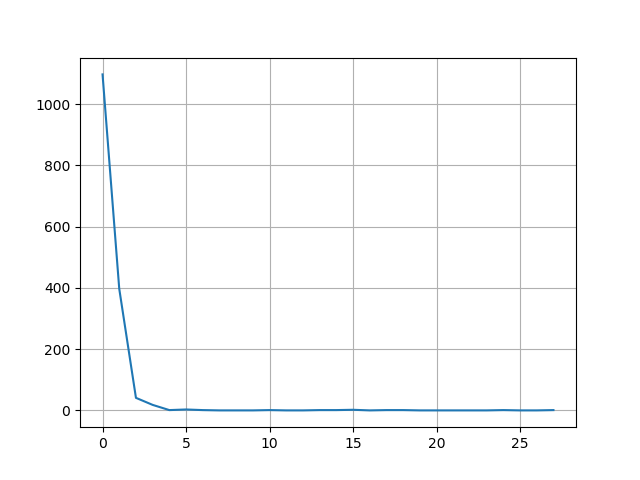

In [51]:
ind = 0
key = keys[ind]
print(key)
cur = distances[key]
import matplotlib.pylab as plt
%matplotlib notebook
plt.plot([i for i,_ in enumerate(cur)], cur)
plt.grid()

index_text


<IPython.core.display.Javascript object>


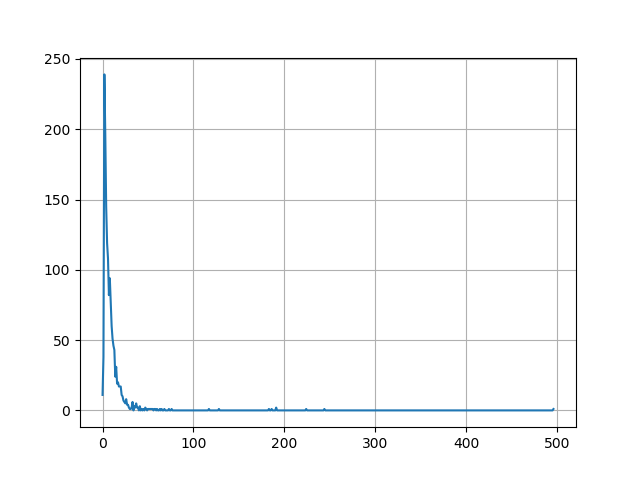

In [52]:
ind +=1
key = keys[ind]
print(key)
cur = distances[key]
import matplotlib.pylab as plt
%matplotlib notebook
plt.plot([i for i,_ in enumerate(cur)], cur)
plt.grid()

index_sent


<IPython.core.display.Javascript object>


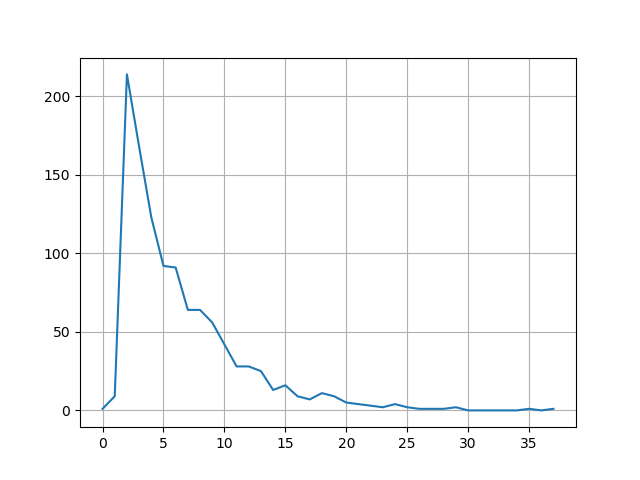

In [53]:
ind += 1
key = keys[ind]
print(key)
cur = distances[key]
import matplotlib.pylab as plt
%matplotlib notebook
plt.plot([i for i,_ in enumerate(cur)], cur)
plt.grid()

index_text


<IPython.core.display.Javascript object>


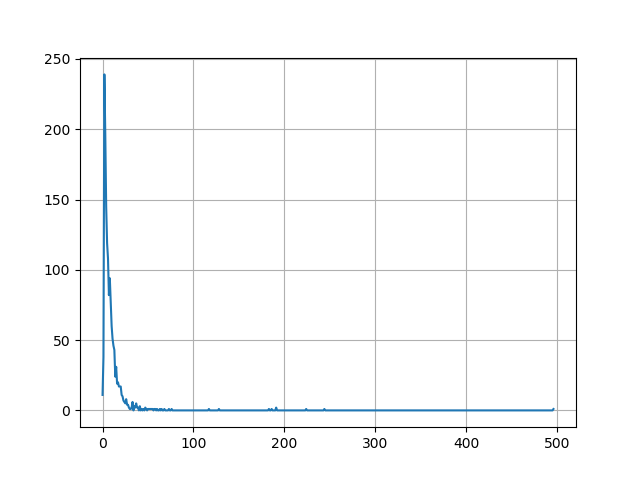

In [52]:
ind +=1
key = keys[ind]
print(key)
cur = distances[key]
import matplotlib.pylab as plt
%matplotlib notebook
plt.plot([i for i,_ in enumerate(cur)], cur)
plt.grid()

start_symb


<IPython.core.display.Javascript object>


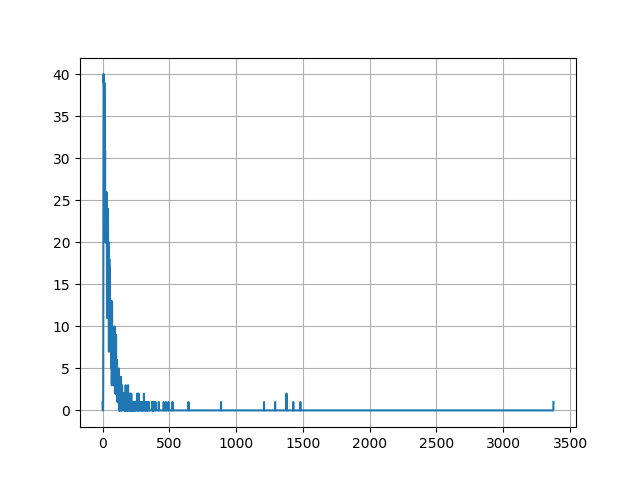

In [54]:
ind += 1
key = keys[ind]
print(key)
cur = distances[key]
import matplotlib.pylab as plt
%matplotlib notebook
plt.plot([i for i,_ in enumerate(cur)], cur)
plt.grid()

end_symb


<IPython.core.display.Javascript object>


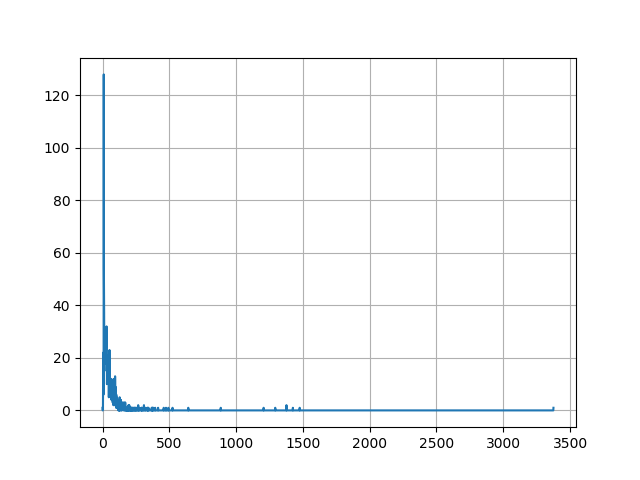

In [55]:
ind +=1
key = keys[ind]
print(key)
cur = distances[key]
import matplotlib.pylab as plt
%matplotlib notebook
plt.plot([i for i,_ in enumerate(cur)], cur)
plt.grid()